<a href="https://colab.research.google.com/github/keunsooyoon/python202206/blob/main/pythonbasic05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 코랩에서 셀레니움 크롬 사용 설정

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 5.3 MB/s 
     |████████████████████████████████| 358 kB 10.3 MB/s 
     |████████████████████████████████| 138 kB 20.9 MB/s 
     |████████████████████████████████| 4.0 MB 35.5 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://se

In [3]:
# 크롬에서 별도의 웹 브라우저를 띄울수 없기 때문에 가상화

import time
from selenium import webdriver
from bs4 import BeautifulSoup as bs

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [4]:
driver.get('https://www.genie.co.kr/chart/top200')

response = driver.page_source
soup = bs(response)

In [6]:
len(soup.select('tr'))

51

In [7]:
len(soup.select('tr.list'))

50

In [8]:
songs = soup.select('tr.list')
song = songs[0]

In [15]:
# rank
rank = 1
# title
soup.select('a.title.ellipsis')[0].text.strip()
# singer
soup.select('a.artist.ellipsis')[0].text.strip()

'싸이 (Psy)'

In [19]:
song_list = []

rank = 1
songs = soup.select('tr.list')

for song in songs:
  title = song.select('a.title.ellipsis')[0].text.strip()
  singer = song.select('a.artist.ellipsis')[0].text.strip()
  song_list.append(['Ginei',rank, title, singer])
  rank += 1



In [ ]:
# 지니는 다른 사이트와는 달리 50곡씩 나누어져 있다. 
# 파이썬 코드로 다음 페이지로 이동하여 다시한번 읽어 온다. 

next_btn = '#body-content > div.page-nav.rank-page-nav > a.current' 
driver.find_element_by_css_selector(next_btn).click()

In [20]:
response = driver.page_source
soup = bs(response)
songs = soup.select('tr.list')

for song in songs:
  title = song.select('a.title.ellipsis')[0].text.strip()
  singer = song.select('a.artist.ellipsis')[0].text.strip()
  song_list.append(['Ginei',rank, title, singer])
  rank += 1

In [22]:
import pandas as pd

df = pd.DataFrame(song_list, columns = ['서비스','순위','타이틀','가수'])
df

,서비스,순위,타이틀,가수
0,Ginei,1,That That (Prod. & Feat. SUGA of BTS),싸이 (Psy)
1,Ginei,2,TOMBOY,(여자)아이들
2,Ginei,3,LOVE DIVE,IVE (아이브)
3,Ginei,4,사랑인가 봐,멜로망스 (MeloMance)
4,Ginei,5,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
...,...,...,...,...
95,Ginei,96,어마어마해,WSG워너비
96,Ginei,97,strawberry moon,아이유 (IU)
97,Ginei,98,Next Level,aespa
98,Ginei,99,Stronger (What Doesn't Kill You),Kelly Clarkson


In [23]:
df.to_excel('Ginie.xlsx', index=False)

In [ ]:
##################################################
# 네이버 영화 랭킹 평점순(현재상영영화)
# 순위, 영화명, 평점
# 크롤링하여 데이터 프레임으로 만들어 엑셀 파일 제출 
# NaverMovie.xlsx
##################################################

<html lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220607" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="
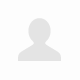
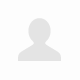

In [27]:
driver.get('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220607')

response = driver.page_source
soup = bs(response)
soup

In [28]:
len(soup.select('tr'))

40

In [29]:
len(soup.select('tbody > tr'))

39

In [30]:
len(soup.select('table.list_ranking > tbody > tr'))

37

In [31]:
len(soup.select('div.old_content > table.list_ranking > tbody > tr'))

0

In [32]:
# 상향식으로 걸리지 않을때는 하향식으로 다시 검색

len(soup.select('div.tit5 > a'))

32

In [36]:
movies = soup.select('div.tit5 > a')
movie = movies[0]
movie.text

'범죄도시2'

In [41]:
soup.select('td.point')
points = soup.select('td.point')
point = points[0]
point.text

'9.52'

In [44]:
movie_list = []

rank = 1

movies = soup.select('td.title')
points = soup.select('td.point')

for each in range(len(soup.select('td.title'))):
  title = movies[each].text.strip()
  point = points[each].text.strip()
  movie_list.append(['네이버무비',rank, title, point])
  rank += 1

df = pd.DataFrame(movie_list, columns=['서비스명','순위','제목','평점'])
df


,서비스명,순위,제목,평점
0,네이버무비,1,범죄도시2,9.52
1,네이버무비,2,씽2게더,9.39
2,네이버무비,3,극장판 주술회전 0,9.25
3,네이버무비,4,어느 가족,9.20
4,네이버무비,5,해피 투게더,9.19
5,네이버무비,6,코다,9.13
6,네이버무비,7,러브레터,9.13
7,네이버무비,8,중경삼림,8.90
8,네이버무비,9,그렇게 아버지가 된다,8.87
9,네이버무비,10,화양연화,8.81


In [45]:
# 날씨 크롤링

# 현재 온도 : 23.4° 
# 현재 상태 : 흐림

# 코랩에서 셀레니움 크롬 사용 설정

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.n

In [48]:
driver.get('https://weather.naver.com/')

response = driver.page_source
soup = bs(response)


In [49]:
soup.select('strong.current')

[<strong class="current ">
 <span class="blind">현재 온도</span>23.9<span class="degree">°</span>
 </strong>]

In [55]:
soup.select('strong.current')[0].text[6:].strip()

'23.9°'

In [59]:
soup.select('span.weather')[0].text.strip()

'흐림'

In [60]:

from selenium import webdriver
from bs4 import BeautifulSoup as bs

driver.get('https://weather.naver.com/')

response = driver.page_source
soup = bs(response)

temp = soup.select('strong.current')[0].text[6:].strip()
weather = soup.select('span.weather')[0].text.strip()

print(f'현재 온도 : {temp}') 
print(f'현재 상태 : {weather}') 

현재 온도 : 24.3°
현재 상태 : 흐림
